<a href="https://colab.research.google.com/github/Electra89/AirBnb_Booking_Analysis/blob/main/SM_%7C_AirBnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Team
##### **Team Member 1 -** Sivasubramani Konar
##### **Team Member 2 -** Shreyas Mhatre


# **Project Summary -**


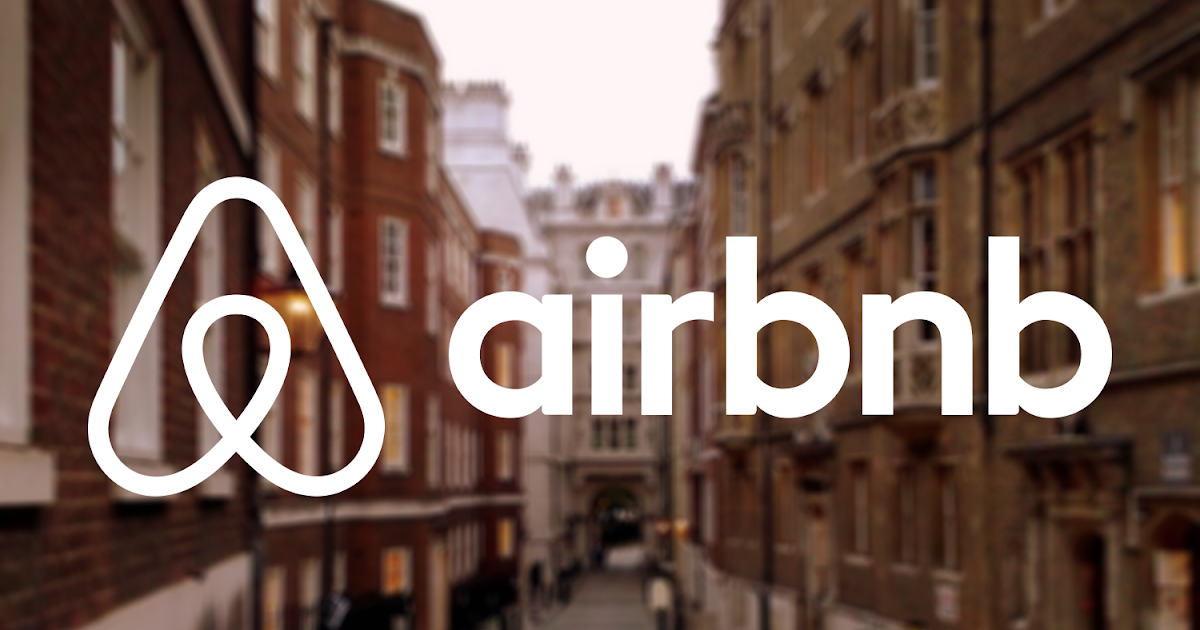






---

> - The aim of our Airbnb booking analysis was to understand the factors influencing Airbnb prices in New York City and to identify patterns within the dataset. Our analysis provides valuable insights for travelers, hosts, and Airbnb as a platform, enhancing the understanding of New York City's dynamic hospitality landscape.
> - Our analysis began with thorough data exploration and cleaning. This crucial phase involved understanding the data's characteristics, including data types, missing values, and value distributions. Simultaneously, we jump on the data cleaning process, addressing issues such as errors, missing values, and duplicates while removing outliers. This rigorous data preparation ensured the quality and integrity of our analysis, enabling us to work with accurate and reliable information.
> - After we made sure the data was neat and organized, we started looking at it more closely. Our goal was to find useful information that could help both hosts and travelers.This exploration involved creating visualizations, running statistical summaries, and identifying relationships between different variables. Through this process, we aimed to answer questions and uncover patterns that might not be immediately apparent from raw data alone.

# **GitHub Link -**

[Click here to open Github repo.](https://github.com/Electra89/AirBnb_Booking_Analysis)

# **Problem Statement**


> Explore the Airbnb dataset to gain insights into host behaviors and area-specific trends. Additionally, leverage predictive analysis to uncover valuable information related to property locations, prices, and reviews. Investigate variations in listing traffic among different areas and identify the underlying factors driving these differences.

#### **Define Your Business Objective?**

> The business objective on Airbnb is to create a thriving online marketplace that connects travelers seeking accommodations with hosts who have available lodging. This platform aims to offer a wide range of lodging options to travelers, promote the utilization of spare or vacant properties, and facilitate seamless transactions between guests and hosts.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np                                              # Library for efficient numerical operations
import pandas as pd                                             # Library for data manipulation
import matplotlib.pyplot as plt                                 # Library for creating visualizations and plots in Python.
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns                                           # Library for creating visualizations and plots in Python.


### Dataset Loading

In [ ]:
# Loading Dataset

Dataset_path = 'https://raw.githubusercontent.com/Electra89/AirBnb_Booking_Analysis/main/Airbnb_NYC.csv'
df=pd.read_csv(Dataset_path)

### Dataset First View

In [ ]:
# Dataset First Look

df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19/10/2018   
1  Entire home/apt    225               1                 45  21/05/2019   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  05/07/2019   
4  Entire home/apt     80              10                  9  19/11/2018   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

print(f"Number of Rows: {df.shape[0]} \nNumber of Columns: {df.shape[1]}")

Number of Rows: 48895 
Number of Columns: 16


### Dataset Information

In [ ]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

print(f"Duplicate Value Counts: {df.duplicated().sum()}")

Duplicate Value Counts: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

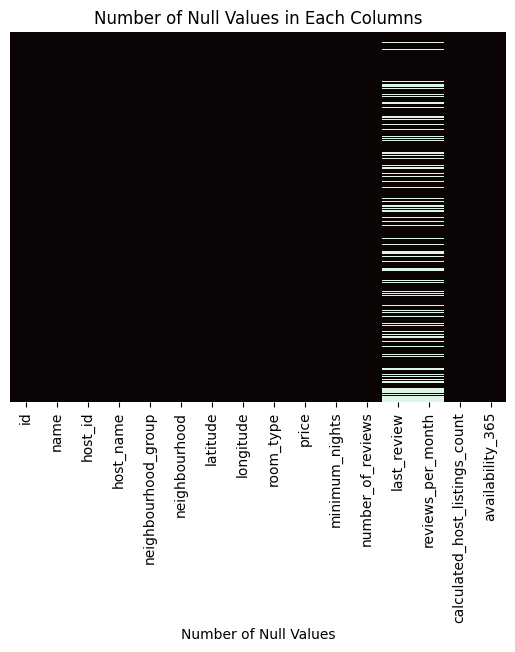

In [ ]:
# Visualizing the missing values
null_counts = df.isnull().sum()

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.title('Number of Null Values in Each Columns')
plt.xlabel('Number of Null Values')
plt.show()

### What did you know about your dataset?

> - The dataset encompasses close to 49,000 records from New York City, featuring 16 columns of data.
> - It incorporates a wide variety of information, including categorical and numeric variables, geographical coordinates, and datetime entries, offering a comprehensive overview of the Airbnb listings in the city.


## ***2. Understanding Your Variables***

>We can see our dataset has 48895 rows/indexes and 16 columns/variables. Lets try to understand about the variables we've got here.


---

Columns            | Descriptions
-------------------|------------------
id                 | a unique id identifying an Airbnb listing
name               | the name of listed properties/room type on the platform
host_id            | a unique id identifying an Airbnb host
host_name          | name under whom the host is registered
neighbourhood_group| a group of area
neighbourhood      | area that falls under neighbourhood_group
latitude           | coordinate of the listing
longitude          | coordinate of the listing
room_type          | type to categorize listing rooms
price              | price of the listing
minimum_nights     | minimum nights required to pay in a single visit
number_of_reviews  | total count of reviews given by visitors
last_review        | content of the last review given
reviews_per_month  | checks of per month/reviews given per month
calculated_host_listings_count | total number of listings registered under the host
availability_365   | the number of days for which a host is available in a year




In [ ]:
# Dataset Columns

df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe

df.describe().transpose().style.background_gradient( cmap="icefire")

### Variables Description

In [ ]:
df.dtypes.value_counts()

int64      7
object     6
float64    3
dtype: int64

So, we get to know that some columns falls under categorical and remaining are numeriacal except one last_review comes under Date_Time category.

| Category            | Variable Name                     |
|---------------------|-----------------------------------|
| Categorical         | name, host_name, neighbourhood_group, neighbourhood, room_type, price |
| Numerical           | id, host_id, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 |
| Date/Time           | last_review                        |
| Coordinates         | latitude, longitude                |

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
def unique_values(data_frame):
    for column in data_frame.columns:
        unique_values = data_frame[column].nunique()
        print(f"Column '{column}' has  unique value(s): {unique_values}")

# Call the function with your DataFrame
unique_values(df)

Column 'id' has  unique value(s): 48895
Column 'name' has  unique value(s): 47896
Column 'host_id' has  unique value(s): 37457
Column 'host_name' has  unique value(s): 11452
Column 'neighbourhood_group' has  unique value(s): 5
Column 'neighbourhood' has  unique value(s): 221
Column 'latitude' has  unique value(s): 19048
Column 'longitude' has  unique value(s): 14718
Column 'room_type' has  unique value(s): 3
Column 'price' has  unique value(s): 674
Column 'minimum_nights' has  unique value(s): 109
Column 'number_of_reviews' has  unique value(s): 394
Column 'last_review' has  unique value(s): 1764
Column 'reviews_per_month' has  unique value(s): 937
Column 'calculated_host_listings_count' has  unique value(s): 47
Column 'availability_365' has  unique value(s): 366


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Shape of the dataframe before Data Wrangling
print(f"Dataset size before dropping values : {df.shape}")

# Dropping the last review and reviews per month columns as they consist of  null values.
new_df = df.drop(df[['last_review','reviews_per_month']],axis = 1)


Dataset size before dropping values : (48895, 16)


In [ ]:
# Dropping the rows consists of null values
new_df.dropna(axis = 0,inplace = True)


#We can clearly see that minimum price is 0 , which is surprising as price 0 does not make sense to do business.
#So we will fill those zero value with median value according to the room type

# Dropping the row having price == 0
new_df = new_df.drop(new_df[new_df['price'] == 0].index)

# Shape of the dataframe after Data Wrangling
print(f"Dataset size after dropping  : {new_df.shape}")

Dataset size after dropping  : (48847, 14)


### What all manipulations have you done and insights you found?



*   According to the dataframe information, the columns **' last_review '** and **' reviews_per_month '** both contain **10052** null values, which means that none of these columns is significant for our data exploration.
*   We must address the issue of a minimum price of **0$** on Airbnb, as the platform does not offer free stays at any hotel. Since the number of affected rows is relatively small, we should consider removing those rows from the dataset.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Top 10 expensive neighbourhood in new york

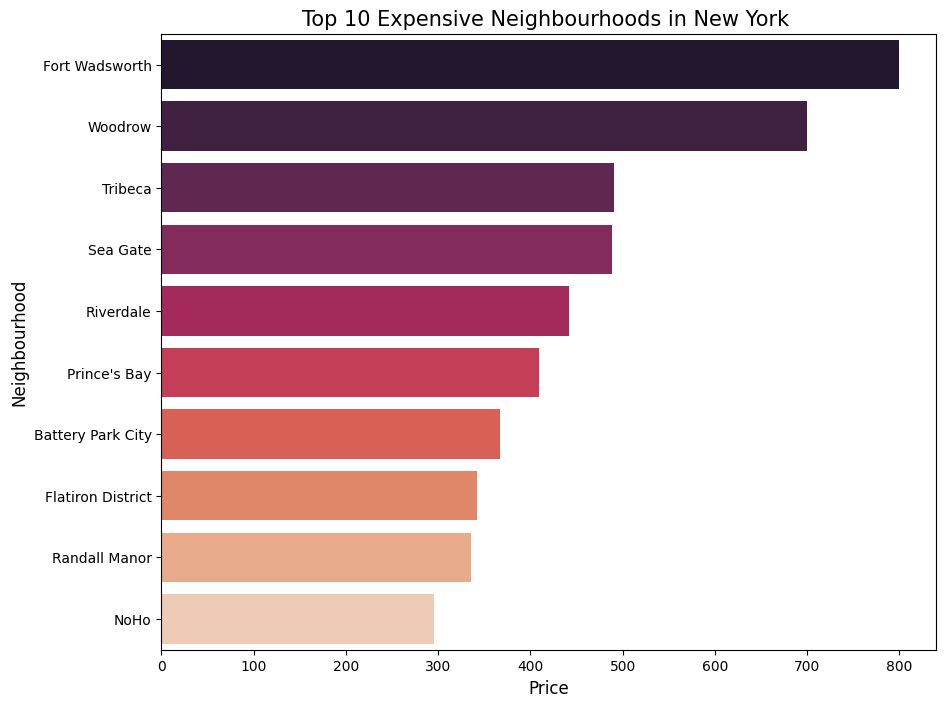

In [ ]:
#@markdown
# Top 10 expensive neighbourhood in New York.

Top_10_expensive_neighbourhood = new_df.groupby('neighbourhood')['price'].mean().sort_values(ascending  = False).reset_index().head(10)

# Creating a bar plot to visualize the data
plt.figure(figsize = (10,8))

sns.barplot(data=Top_10_expensive_neighbourhood, x='price', y='neighbourhood', palette='rocket')

# Adding  a title to the plot
plt.title('Top 10 Expensive Neighbourhoods in New York ', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Price', fontsize=12, color='black')
plt.ylabel('Neighbourhood', fontsize=12, color='black')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

>A bar plot was chosen for visualizing the top 10 expensive neighborhoods in New York City because it effectively compares different neighborhoods based on their average prices, making it easy to identify the most expensive ones.

##### 2. What is/are the insight(s) found from the chart?

>**Fort Wadsworth,Woodrow and Tribeca** are having expensive neighbourhood over other neighbourhood with average prices of **800**, **700** and **490\$** respectively


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>Certainly, if neighborhoods like **Fort Wadsworth**, **Woodrow**, and **Tribeca** have more available hosting options than there are people wanting to stay, it could lead to a drop in prices, making it more cost-effective for tourists visiting those areas.

#### Chart - 2 : Distribution of types of room in different neighbourhood group.

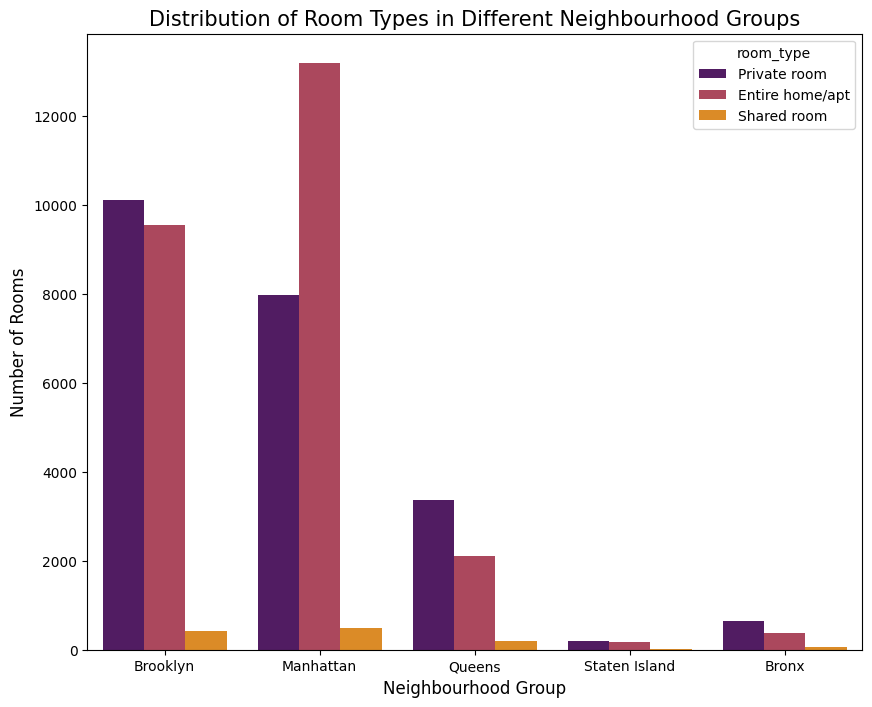

In [ ]:
#@markdown
# Distribution of types of room in different neighbourhood group

# Creating a countplot to display the frequency of categorical data
plt.figure(figsize = (10,8))

sns.countplot(data=new_df, x='neighbourhood_group', hue='room_type', palette='inferno')

# Adding a title to the plot
plt.title('Distribution of Room Types in Different Neighbourhood Groups', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Neighbourhood Group', fontsize=12, color='black')
plt.ylabel('Number of Rooms', fontsize=12, color='black')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

>The countplot is a suitable choice for visualizing the distribution of room types within different neighborhood groups in the Airbnb dataset because it effectively conveys categorical data and allows for easy comparison.

##### 2. What is/are the insight(s) found from the chart?

>From the chart  we can observe that **Brooklyn** has a high number of **private room** listings,  **Manhattan** is prominent for **entire home/apartment and shared room** listings, and, in contrast, **Staten Island** has the fewest hosted Airbnb listings among the neighborhoods in New York.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - Hosts can customize their listings to the predominant room types in each neighborhood group. For example, In **Brooklyn**, where **private rooms** are highly hosted, hosts might choose to offer more **private rooms**, which align with the local demand.
> - Hosts can adjust their pricing strategies based on the popularity of specific room types. Understanding which room types are in high demand can help hosts set competitive and profitable prices.

#### Chart - 3 : Distribution of room in NY

>**This chart shows the location with respect to longitude and latitude of different neighbourhood groups in the city.**

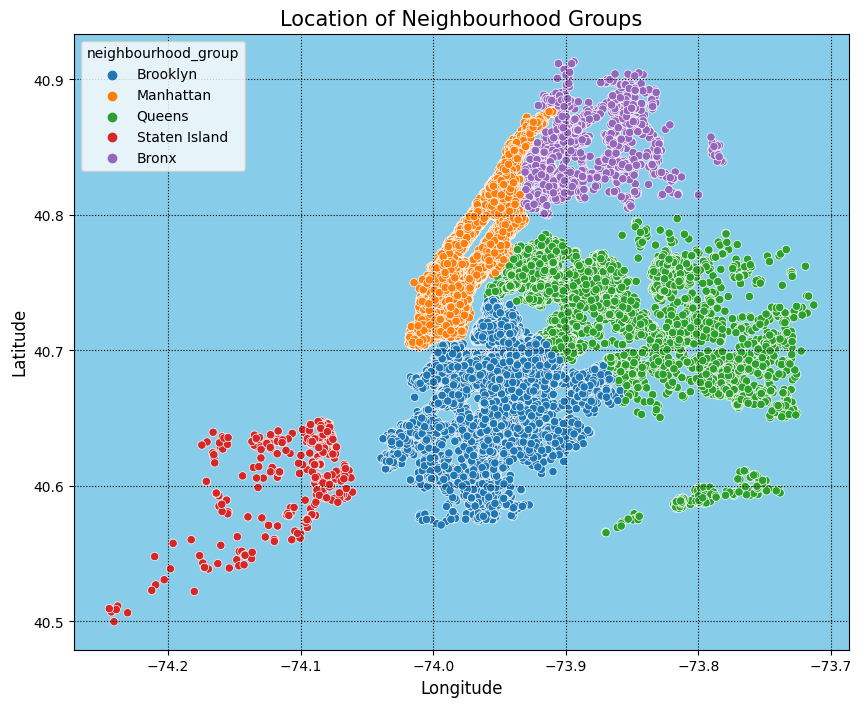

In [ ]:
#@markdown
# This chart shows the location wrt longitude and latitude of different neighbourhood groups in the city.

plt.figure(figsize = (10,8))
ax=plt.axes()
ax.set_facecolor(color='#87cce8')

# Creating a bar plot using Seaborn's scatterplot
sns.scatterplot(data=new_df, x='longitude', y='latitude', hue='neighbourhood_group')

# Add a title to the plot
plt.title('Location of Neighbourhood Groups', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Longitude', fontsize=12, color='black')
plt.ylabel('Latitude', fontsize=12, color='black')

# Add a grid
plt.grid(True, color='k', linestyle=':')

# Display the plot
plt.show()

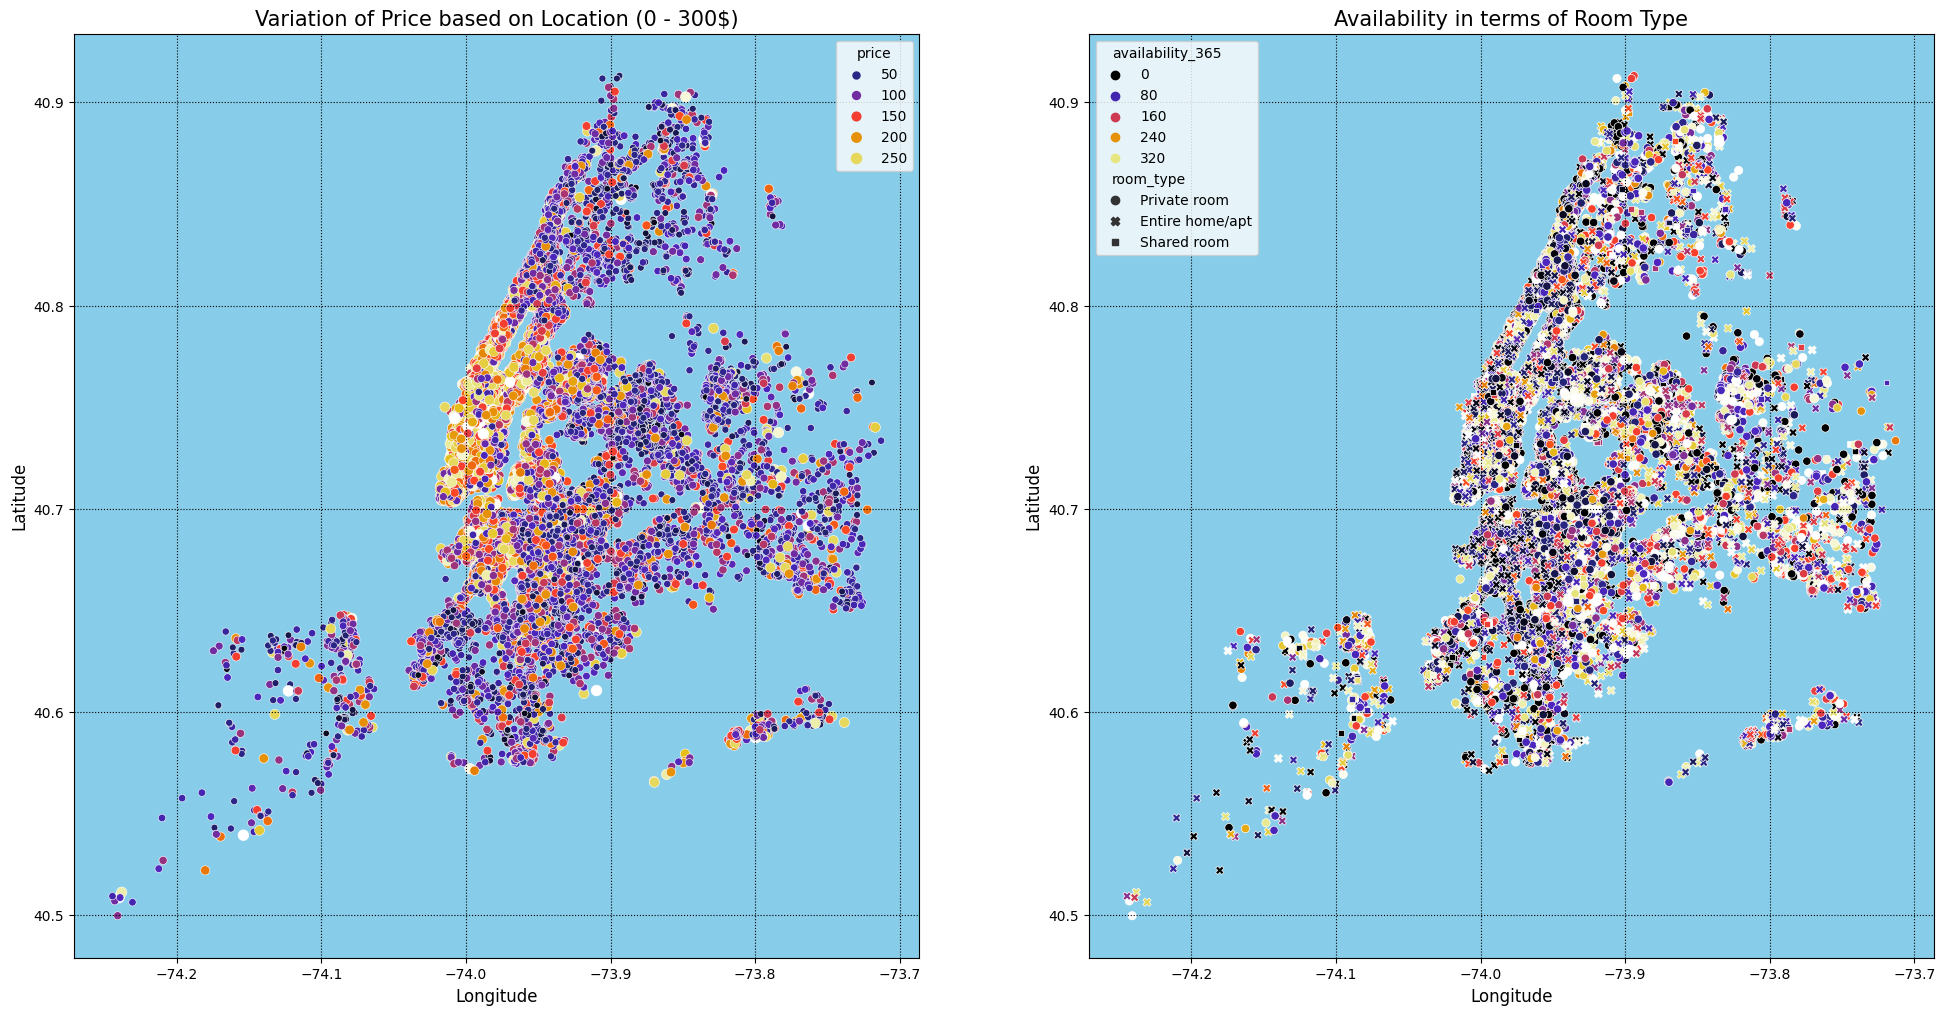

In [ ]:
#@markdown
# Creating a figure with two subplots (1 row, 2 columns) and seting the figure size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
ax = axes.flatten()

# Set the background color of the subplot
ax[0].set_facecolor(color='#87cce8')
ax[1].set_facecolor(color='#87cce8')

# Creating a scatterplot to see data relationships for Price vs. Location
sns.scatterplot(data=new_df[new_df['price'] < 300], x='longitude', y='latitude', hue='price', size="price", sizes=(20, 60), palette='CMRmap', ax=ax[0])
ax[0].set_title('Variation of Price based on Location (0 - 300$)', fontsize=15, color='black')

# Adding  grid and Label the x and y axes to the first subplot
ax[0].grid(True, color='k', linestyle=':')
ax[0].set_xlabel('Longitude', fontsize=12, color='black')
ax[0].set_ylabel('Latitude', fontsize=12, color='black')

# Creating a scatterplot to see data relationships for Availability and Room Type
sns.scatterplot(data=new_df, x='longitude', y='latitude', hue='availability_365', style="room_type", palette='CMRmap', ax=ax[1])
ax[1].set_title('Availability in terms of Room Type', fontsize=15, color='black')

# Adding  grid and Label the x and y axes to the second subplot
ax[1].grid(True, color='k', linestyle=':')
ax[1].set_xlabel('Longitude', fontsize=12, color='black')
ax[1].set_ylabel('Latitude', fontsize=12, color='black')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

>The scatter plot is an appropriate choice for visualizing the relationship between price and location (longitude and latitude) because it effectively presents data with multiple dimensions and helps identify patterns and trends.






##### 2. What is/are the insight(s) found from the chart?

> - In the first plot, we focused solely on listings with prices up to a maximum of **300\$**, as our 75th percentile data falls within the range of **175\$**. This allowed us to examine how price variations are distributed across different locations in the city. Notably, the southern part of **Manhattan** and the northern area of **Brooklyn** are recognized as expensive regions within New York.
> - In the second plot, our objective was to illustrate the availability of accommodations based on room types. Although availability appears fairly **balanced** across room categories, there is a distinct trend where the **heart of New York City** consistently registers the highest booking rates.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

>The insights from the first plot about price variations across different locations in the city can help hosts and property investors make informed decisions about pricing their listings. They can customize their rates based on the location, optimizing their earnings and attracting guests willing to pay more for premium areas.

#### Chart - 4 : Relationship between hosts and areas

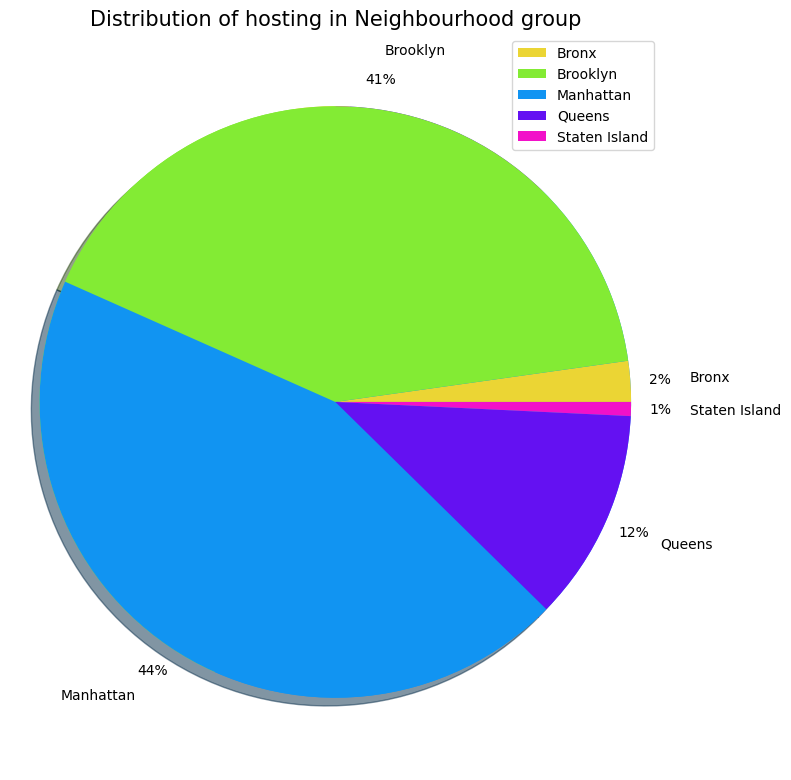

In [ ]:
#@markdown
# Relationship between hosts and areas
relation_bet_hosts_vs_areas = new_df.groupby('neighbourhood_group')['neighbourhood'].count()

# Creating a  pie chart to see the distribution in percentage of each most common neighborhood in each group
plt.figure(figsize = (8,8))

labels = relation_bet_hosts_vs_areas.index
sizes = relation_bet_hosts_vs_areas.values
colours = ['#ebd534','#83eb34','#1194f2','#6411f2','#f211c9']
patches, texts = plt.pie(sizes, shadow=False, startangle=90,colors=colours)
plt.pie(sizes, labels=labels, autopct='%1.0f%%',colors=colours, pctdistance=1.1, labeldistance=1.2,shadow = True)
plt.legend(patches, labels,loc = 'upper right')
plt.axis('equal')
plt.tight_layout()

# Adding a title to the plot
plt.title('Distribution of hosting in Neighbourhood group', fontsize=15, color='black')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> The pie chart is a suitable choice for representing the distribution of the "Relation between hosts and areas" variable because it effectively communicates the proportions of different categories in a categorical dataset, making it clear and informative

##### 2. What is/are the insight(s) found from the chart?

> **Manhattan** leads the Airbnb market with the highest number of listings, followed closely by **Brooklyn**, which is a favored choice for accommodations. Additionally, **Queens and Bronx** also have a substantial presence, with **Queens** boasting more listings than the **Bronx**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> This insights can be employed by hosts and real estate investors to make strategic investments in high-demand regions like **Manhattan** and **Brooklyn**, where they may have the potential to secure elevated prices and occupancy rates.


#### Chart - 5 : Price Distribution Of Each Neighborhood Group using Violin Plot

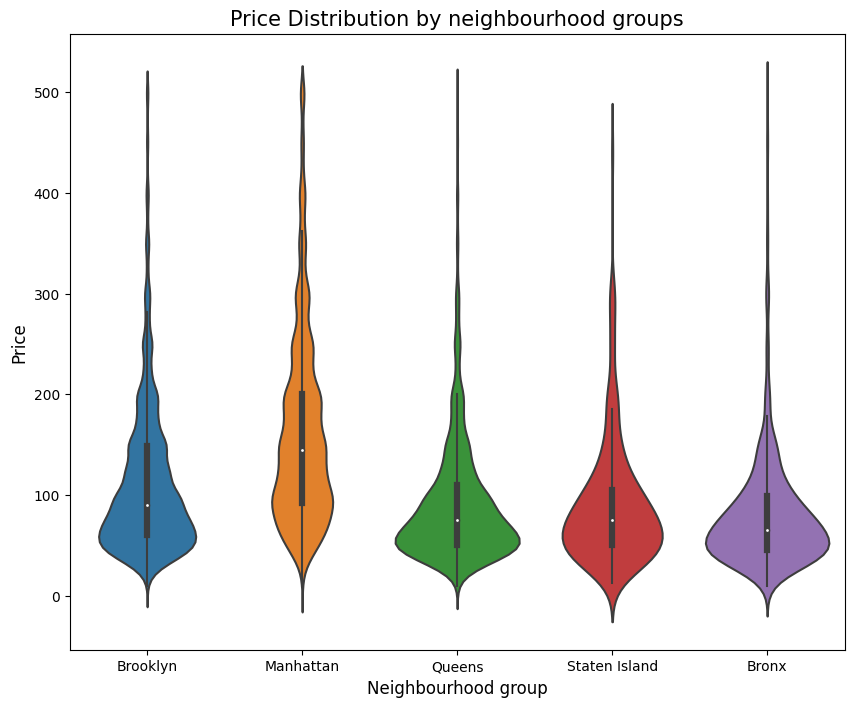

In [ ]:
#@markdown
# Price Distribution Of Each Neighborhood Group using Violin Plot

# Creating a Violin Plot to visualize the distribution of data
plt.figure(figsize=(10,8))

price_range_upto_300 = new_df[new_df['price'] <= 500]
ax = sns.violinplot(x="neighbourhood_group", y="price", data=price_range_upto_300)

# Adding a title to the plot
plt.title('Price Distribution by neighbourhood groups', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Neighbourhood group', fontsize=12, color='black')
plt.ylabel('Price', fontsize=12, color='black')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

- A violin plot was chosen because it effectively conveys the distribution of room prices across different neighborhood groups. This type of chart allows us to visualize not only the central tendency of prices but also their spread and any potential outliers, providing a comprehensive view of the data. It enables easy comparison between multiple neighborhood groups and their price distributions, making it a suitable choice for this analysis.

##### 2. What is/are the insight(s) found from the chart?

> - The chart reveals that **Manhattan** stands out with the **highest room prices** among all neighborhood groups.
> - Conversely, the **Bronx** appears to offer the most **affordable rooms** within the neighborhood groups.
> - Unexpectedly, **Brooklyn, Manhattan, and Queens** display relatively **higher room prices** compared to other neighborhood groups.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> - Understanding that **Manhattan** has the **most expensive rooms** among the neighborhood groups is valuable for property investors and hosts. It suggests that investing in **Manhattan** properties may lead to higher revenue.
> - Recognizing that the **Bronx** has the **cheapest rooms** in the neighborhood group can be advantageous for budget travelers. It may attract a specific segment of cost-conscious tourists.

#### Chart - 6 :  How are the prices distributed in neighbourhood group based on room types

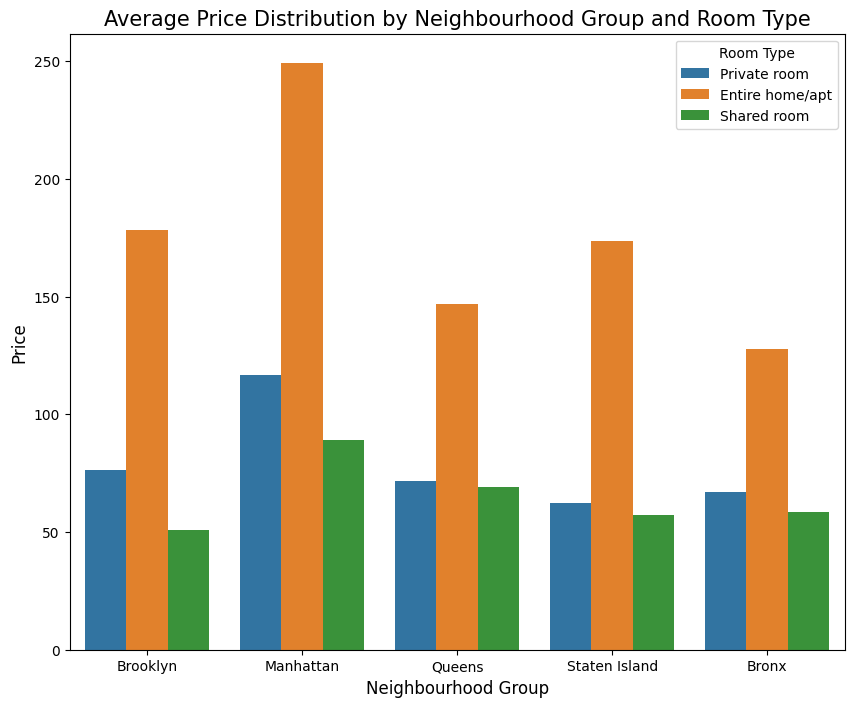

In [ ]:
#@markdown
# Prices distributed in neighbourhood group based on room types

# Creating a bar plot to visualize the data
plt.figure(figsize=(10, 8))

sns.barplot(data=new_df, x='neighbourhood_group', y='price', hue='room_type', errorbar = None)

# Adding a title to the plot
plt.title('Average Price Distribution by Neighbourhood Group and Room Type', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Neighbourhood Group', fontsize=12, color='black')
plt.ylabel('Price', fontsize=12, color='black')

# Showing the legend
plt.legend(title='Room Type')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

> The barplot is an appropriate choice for visualizing the relationships between neighborhood groups, room types, and prices because it allows for easy comparison of continuous variables across different categories while considering an additional categorical variable.

##### 2. What is/are the insight(s) found from the chart?

> - **Manhattan** consistently exhibits the **highest average prices** across all room types compared to other neighborhood groups.
> - **Brooklyn** follows Manhattan in terms of pricing, especially for entire home/apartment listings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Understanding the competitive pricing in different neighborhood groups allows hosts to position their listings strategically. They can attract guests by offering competitive prices while ensuring profitability.

#### Chart - 7 : Top 10 neighbourhood having maximum number of listed rooms/building for airbnb

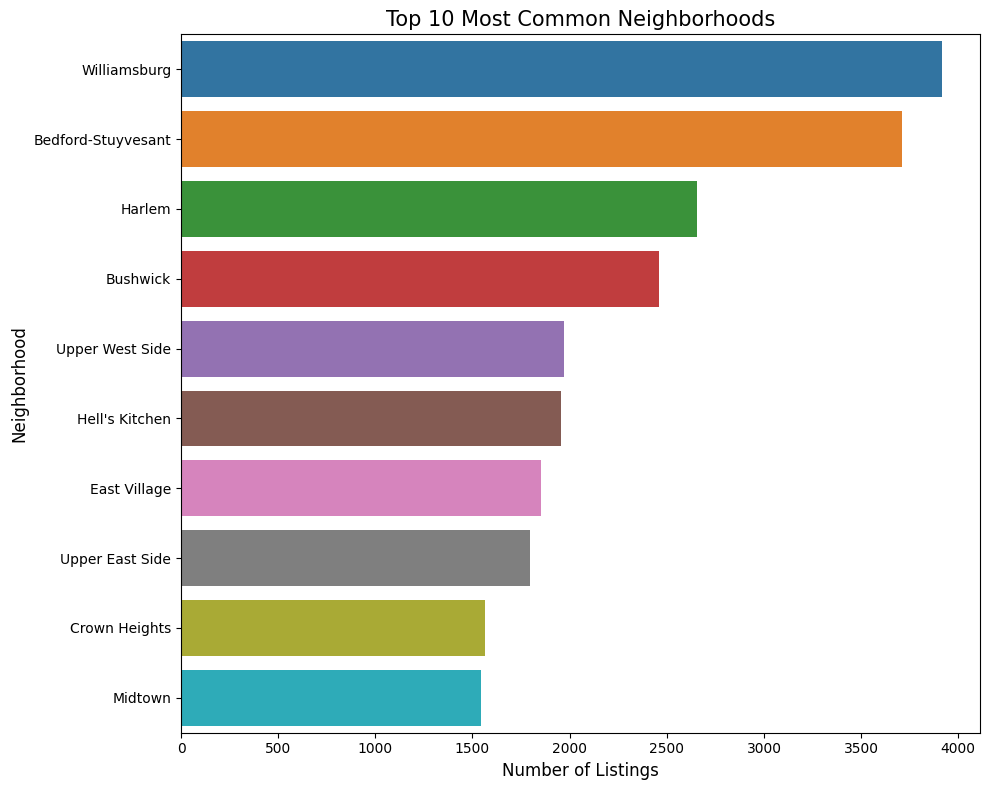

In [ ]:
#@markdown
# Top 10 neighbourhood which are having maximum number of listed rooms/bulding for airbnb in New York

# Get the top 10 neighbourhood having maximum number of listed.
Top_10_neighborhoods_max_listing = new_df['neighbourhood'].value_counts()[:10].reset_index()

# Creating a bar plot to visualize the data
plt.figure(figsize=(10, 8))
sns.barplot(data = Top_10_neighborhoods_max_listing,y ='index',x ='neighbourhood')

# Adding a title to the plot
plt.title('Top 10 Most Common Neighborhoods', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Number of Listings', fontsize=12, color='black')
plt.ylabel('Neighborhood', fontsize=12, color='black')


# Displaying the plot
plt.tight_layout()  # Ensures labels fit within the figure
plt.show()


##### 1. Why did you pick the specific chart?

>The barplot is an appropriate choice for this data because it helps to compare the number of listings across different neighborhoods in a visually clear and concise manner.

##### 2. What is/are the insight(s) found from the chart?

> - **Williamsburg** leads with the **highest number** of listings at **3,916**, followed closely by **Bedford-Stuyvesant** with **3,709** listings, making it the **second** most-listed neighborhood.
> - Several neighborhoods in both **Manhattan and Brooklyn**, including **Upper West Side**, **Hell's Kitchen**, **East Village**, **Upper East Side**, **Williamsburg**, **Bedford-Stuyvesant**, and **Bushwick**, demonstrate a **high density** of Airbnb listings, underscoring their popularity among hosts and travelers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Acknowledging the significant number of listings in different neighborhoods enables hosts to access a varied market and provide options for travelers looking for alternatives to the busier and pricier districts such as Manhattan.

#### Chart - 8 : Top 5 hosts have maximum listings.


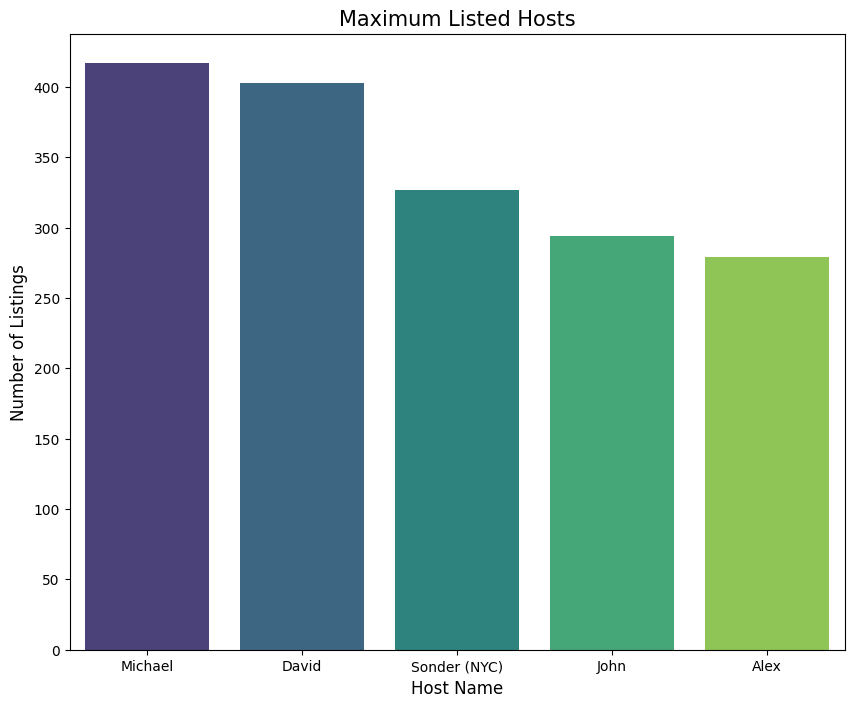

In [ ]:
#@markdown
# Top 5 Hosts that have maximum listings

listing_hosts = new_df.groupby(['host_name']).size().sort_values(ascending=False).iloc[:5].reset_index(name='number_of_listings')

# Creating a bar plot to visualize the data
plt.figure(figsize=(10, 8))
listing_host_df = sns.barplot(x='host_name', y='number_of_listings', data=listing_hosts,palette = 'viridis')

# Adding a title to the plot
plt.title('Maximum Listed Hosts', fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Host Name', fontsize=12, color='black')
plt.ylabel('Number of Listings', fontsize=12, color='black')

# Displaying the plot
plt.show()


##### 1. Why did you pick the specific chart?

 > The bar plot is an appropriate choice for this specific dataset because it allows for a straightforward and visually clear comparison of the number of listings associated with the top hosts.

##### 2. What is/are the insight(s) found from the chart?

> **Michael** and **David**, with **417** and **403** listings, respectively, showcase a high level of activity and a substantial presence in the Airbnb market. Following closely, **Sonder** (NYC) holds a significant position with **327** listings, underscoring its prominence in the New York City Airbnb scene.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Recognizing hosts like **Michael** and **David**, who manage a substantial number of listings, can provide positive publicity for Airbnb. It showcases the platform's ability to attract and support active hosts, which can attract more hosts to join.

#### Chart - 9 : Availability Of Room In Neighbourhood Groups.

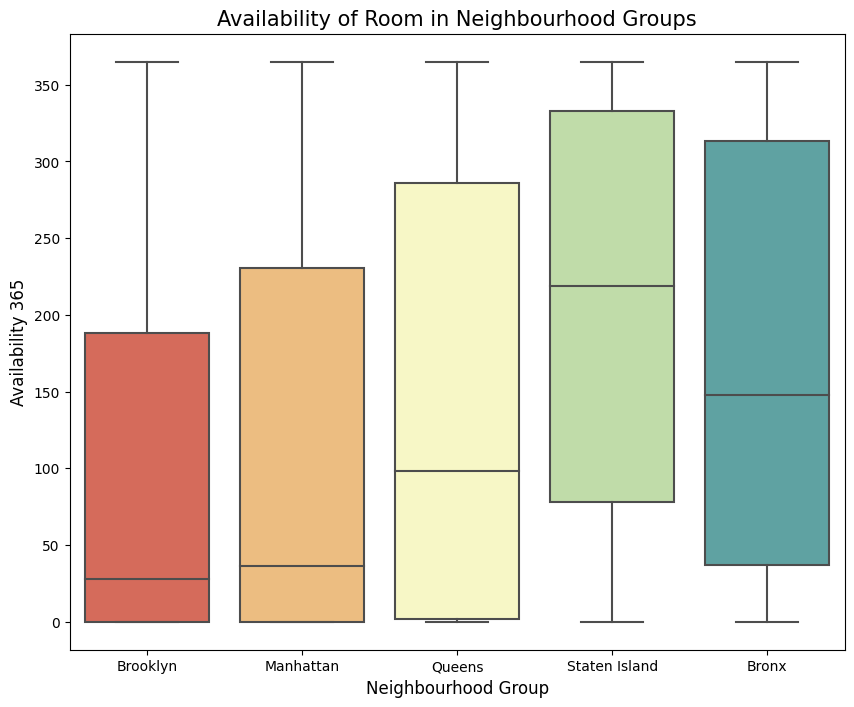

In [ ]:
#@markdown
# Availability Of Room In Neighbourhood Groups.

# Creating a box plot to visualize the data
plt.figure(figsize=(10, 8))
sns.boxplot(data=new_df, x='neighbourhood_group', y='availability_365', palette = 'Spectral')

# Adding a title to the plot
plt.title("Availability of Room in Neighbourhood Groups", fontsize=15, color='black')

# Adding labels for the x and y axes
plt.xlabel('Neighbourhood Group', fontsize=12, color='black')
plt.ylabel('Availability 365', fontsize=12, color='black')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> The boxplot is a practical and informative chart for visualizing the distribution of availability data across neighborhood groups, making it easier to draw insights and comparisons from the data.

##### 2. What is/are the insight(s) found from the chart?

> The chart reveals that **Manhattan** displays a **wider range** of availability values compared to other boroughs, indicating greater variability in listing availability, while **Staten Island** and the **Bronx** show more consistent availability patterns throughout the year with **narrower interquartile ranges**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Airbnb can provide recommendations and guidance to hosts in **Manhattan** on optimizing their pricing and booking strategies, considering the wide range of availability. In contrast, they can offer advice to hosts in **Staten Island** and the **Bronx** on maintaining steady bookings.

#### Chart - 10 : Availability of rooms by room types in neighbourhood group

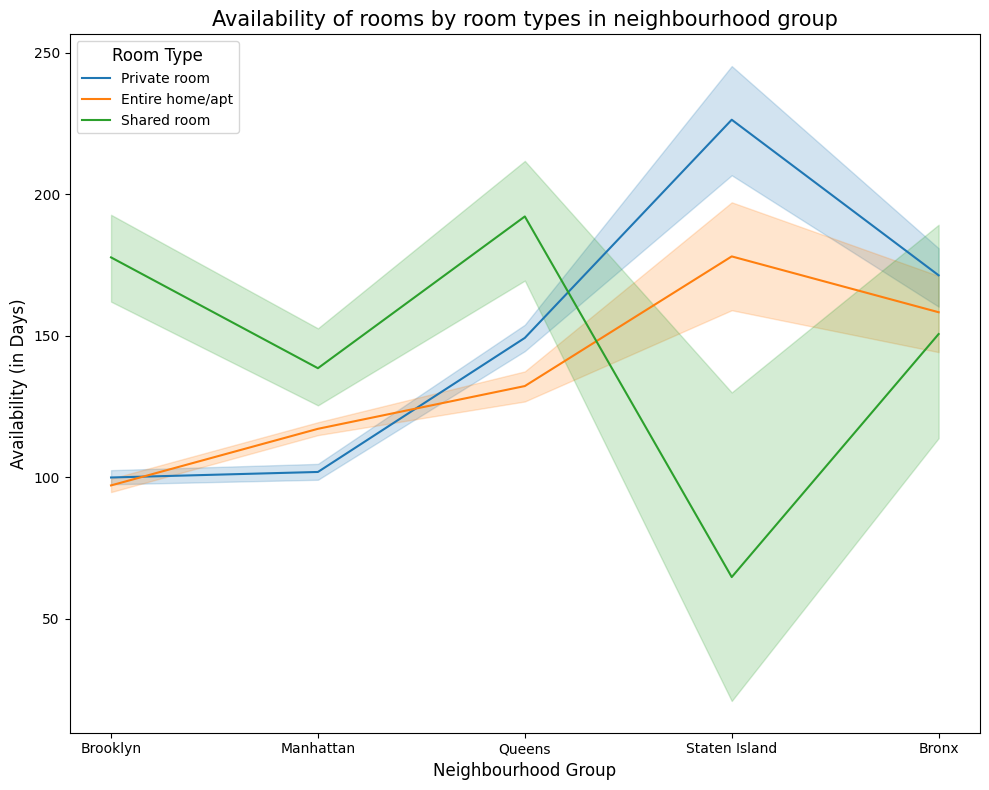

In [ ]:
#@markdown
# Room Availability of neighbourhood group

# Creating a line plot to visualize the data
plt.figure(figsize=(10, 8))
sns.lineplot(data=new_df, x='neighbourhood_group', y='availability_365', hue='room_type')

# Adding a title to the plot
plt.title('Availability of rooms by room types in neighbourhood group', fontsize=15, color='black')

# Show the legend
plt.legend(title='Room Type', title_fontsize=12,loc='upper left')

# Adding labels for the x and y axes
plt.xlabel('Neighbourhood Group', fontsize=12, color='k')
plt.ylabel('Availability (in Days)', fontsize=12, color='black')

# Displaying the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

> The line plot was chosen for its ability to convey the aspect of availability across neighbourhood groups and room types, facilitating easy comparisons and insights into seasonal trends.

##### 2. What is/are the insight(s) found from the chart?

> - The chart reveals that availability fluctuates throughout the year for all neighborhood groups and room types. This suggests that there are specific seasons or periods when accommodations are in higher demand.
> - **Queens** and **Staten Island** stand out as neighborhood groups with relatively **higher availability** for all room types compared to the other neighborhood, potentially making them attractive options for travelers seeking more flexible booking options.
> - **Manhattan** exhibits a unique trend where **Shared rooms** have **higher availability** compared to Private rooms, which is less common in other boroughs. This could be due to the specific nature of accommodation offerings in Manhattan.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Travelers on a budget may face challenges in finding affordable accommodations in highly popular neighborhoods like Manhattan due to lower availability during peak seasons.

#### Chart - 11 : Distribution Of Airbnb Bookings Price Range Using Histogram

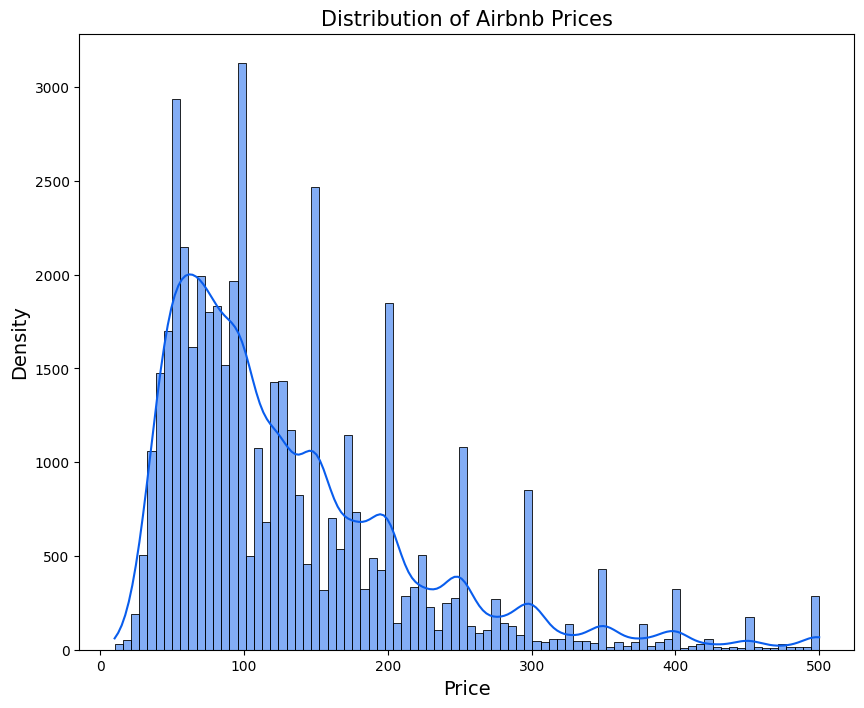

In [ ]:
#@markdown
# Distribution Of Airbnb Bookings Price Range Using Histogram

# Creating a histplot to visualize the data
plt.figure(figsize=(10, 8))
price_range_upto_300 = new_df[new_df['price'] <= 500]
sns.histplot(price_range_upto_300['price'],color = '#095ded',kde = True)

# Adding a title to the plot
plt.title('Distribution of Airbnb Prices',fontsize=15)

# Adding labels for the x and y axes
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

 > A histogram is a powerful visualization tool for exploring the distribution of prices, revealing patterns, and gaining insights into the pricing landscape of Airbnb listings in New York City.

##### 2. What is/are the insight(s) found from the chart?

> - The range of prices charged on Airbnb in New York City spans from **20 to 330\$**.
> - The distribution of prices exhibits a prominent peak in the range of **50 to 150\$**. This indicates that a substantial number of listings fall within this mid-range pricing category, suggesting it is a popular price point for accommodations.
> - The distribution is right-skewed, implying that there are relatively fewer listings with exceptionally high prices compared to the larger number of listings in the mid-price range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Travelers can make more informed decisions based on the price distribution. They can find accommodations within their budget and may discover that there are a significant number of options in the mid-range, providing them with choices that suit their preferences.

#### Chart - 12 : Host name having expensive room from each neighbourhood group

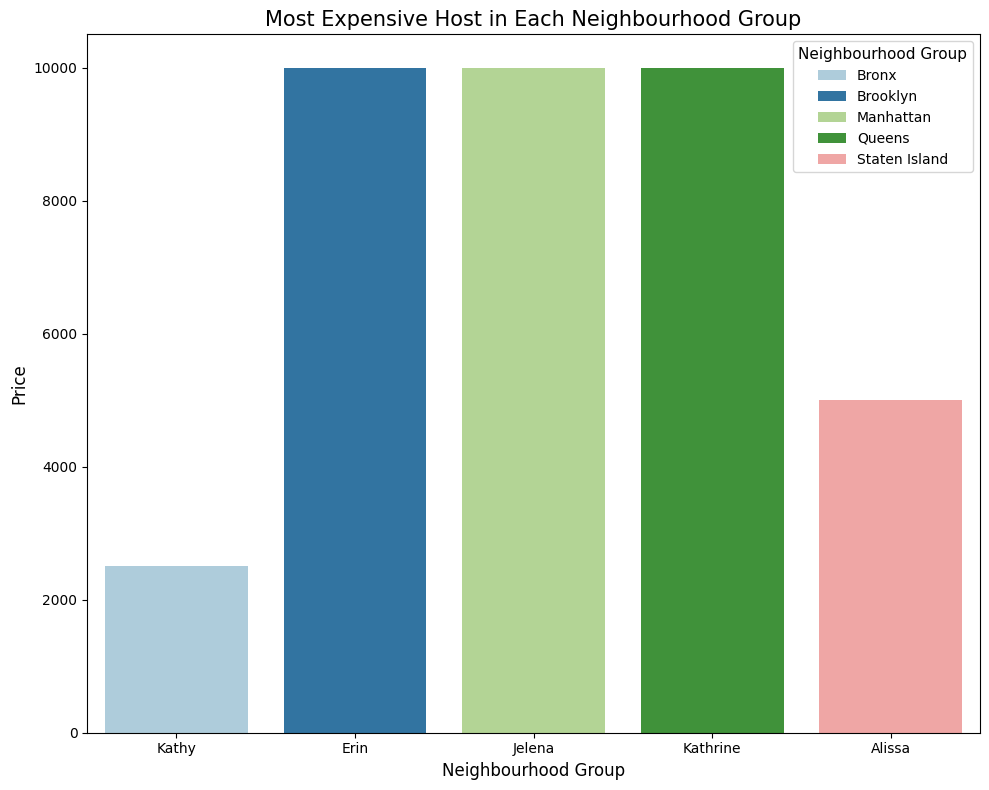

In [ ]:
#@markdown
# host name with the most expensive room in each neighborhood group
expensive_hosts = new_df.groupby(['neighbourhood_group'])[['neighbourhood_group','host_name', 'price']].apply(lambda x: x.nlargest(1, 'price')).reset_index(drop=True)

# Creating a bar plot to visualize the data
plt.figure(figsize=(10, 8))
sns.barplot(expensive_hosts, x='host_name', y='price', hue='neighbourhood_group',palette = 'Paired' ,dodge=False)

# Adding a title to the plot
plt.title('Most Expensive Host in Each Neighbourhood Group', fontsize=15, color='black')

# Showing the legend
plt.legend(title='Neighbourhood Group', title_fontsize=11)

# Adding labels for the x and y axes
plt.xlabel('Neighbourhood Group', fontsize=12, color='black')
plt.ylabel('Price', fontsize=12, color='black')

# Displaying the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

> A barplot was chosen to directly compare the host names and their highest-priced room listings in each neighborhood group, facilitating the identification of top hosts and their distribution across neighborhoods. The use of color distinguishes neighborhood groups, making it effective for this purpose.

##### 2. What is/are the insight(s) found from the chart?

> - **Kathy** has the **most expensive room** listing in the **Bronx** neighborhood group, priced at **2,500\$**.
> - **Erin** has the **most expensive room** listing in the **Brooklyn** neighborhood group, priced at 10,000\$.
> - Both **Jelena** and **Kathrine** have the most **expensive room** listings in the **Manhattan** neighborhood group, both priced at **10,000\$**.
> - **Alissa** has the most **expensive room** listing in the **Queens** neighborhood group, priced at **5,000\$**.

> These insights are valuable for travelers seeking luxury accommodations in specific neighborhood groups and also highlight hosts who offer high-end listings in each area.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Highlighting these hosts can attract luxury travelers who are willing to pay a premium for high-end accommodations. This can lead to increased bookings and higher revenue for hosts offering luxurious properties.

#### Chart - 13 : Average minimum stay duration for room types across different neighborhood groups

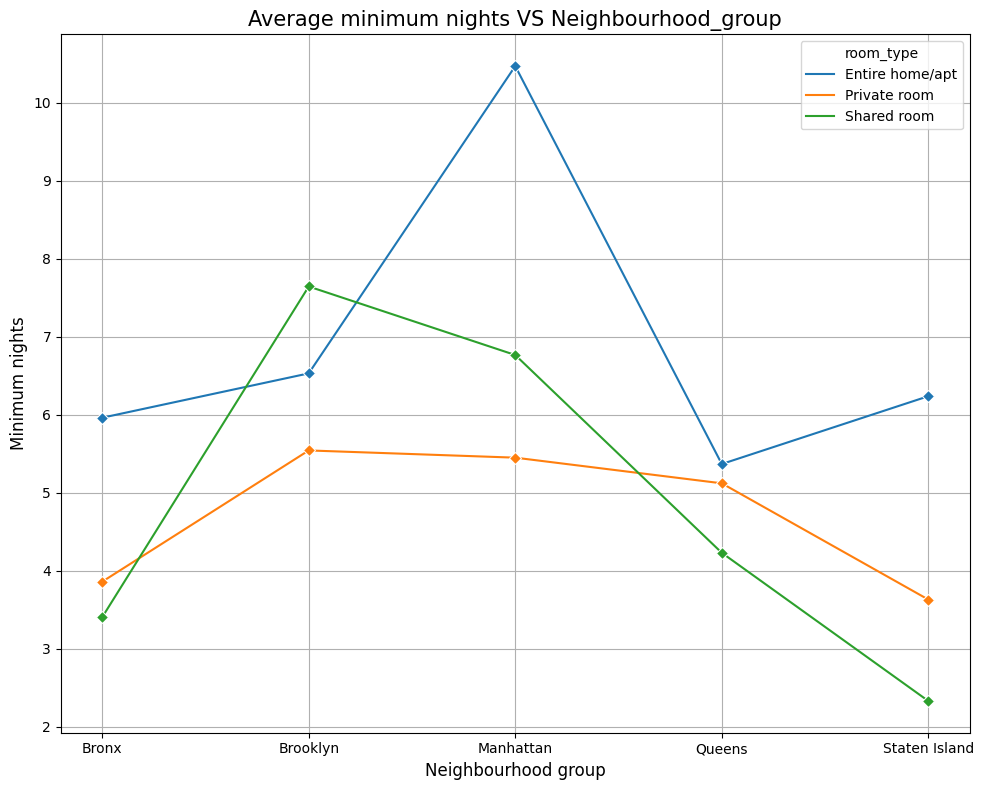

In [ ]:
#@markdown
# Average minimum stay duration for room types across different neighborhood groups

price_by_minimum_nights = new_df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].mean().reset_index()

# Creating a line plot to visualize the data
plt.figure(figsize=(10, 8))
sns.lineplot(data = price_by_minimum_nights,x = 'neighbourhood_group',y='minimum_nights',hue = 'room_type' , marker='D')

# Adding a title to the plot
plt.title('Average minimum nights VS Neighbourhood_group', fontsize=15, color='black')

# Adding  grid and  labels for the x and y axes
plt.grid(True)
plt.xlabel('Neighbourhood group', fontsize=12, color='black')
plt.ylabel('Minimum nights', fontsize=12, color='black')

# Displaying the plot
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

> By presenting the data in lineplot, it becomes straightforward to compare the minimum night requirements for different room types within each neighborhood group and across neighborhood groups.

##### 2. What is/are the insight(s) found from the chart?

> - **Manhattan** typically has the **highest minimum night** requirements for **entire home/apartment** listings among all neighborhood groups, with an average of approximately **10.5 nights**. This suggests that hosts in **Manhattan** often expect longer stays for **entire homes/apartments**.
> - In **Brooklyn**, **private rooms** have a relatively **high average minimum night** requirement, with approximately **5.54 nights**. This indicates that guests seeking private rooms in Brooklyn may be expected to stay for a few nights on average.
> - Shared rooms in **Brooklyn** have the **highest average minimum night** requirement compared to other room types in the same borough, with an average of about **7.64 nights**. This suggests that guests interested in shared rooms in Brooklyn might need to commit to longer stays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

> Guests can make more informed decisions when booking accommodations, knowing the typical minimum night requirements in different areas. This can enhance the overall guest experience by reducing the likelihood of misunderstandings or last-minute booking cancellations.

#### Chart - 14 - Correlation of price with other independent variables

In [ ]:
new_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

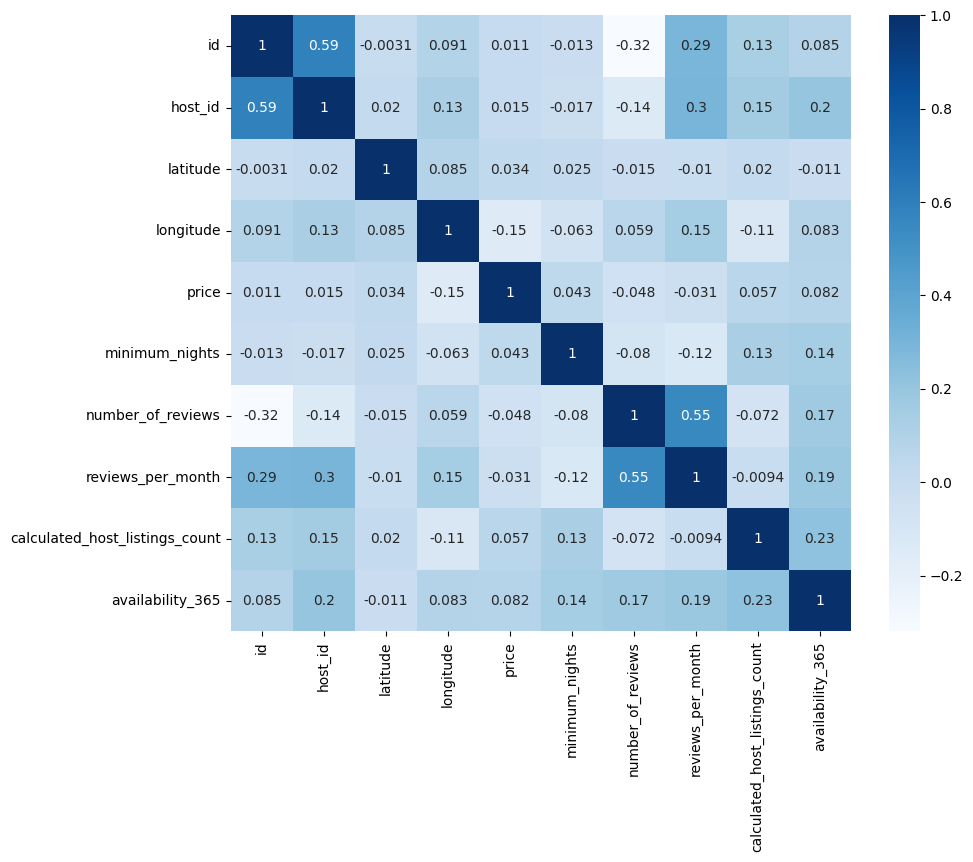

In [ ]:
# Correlation of price with other independent variables
numeric_df=df[['id', 'host_id', 'latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

# Creating a Heatmap to visualize the Correlation data
plt.figure(figsize=(10,8))
heatmap=sns.heatmap(numeric_df.corr() ,cbar=True,annot=True, cmap="Blues")

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> A correlation matrix is a table type graph which indicates the results of correlation coefficients tests between variables at a time. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The fluctuation of correlation is lies between -1 to 1.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

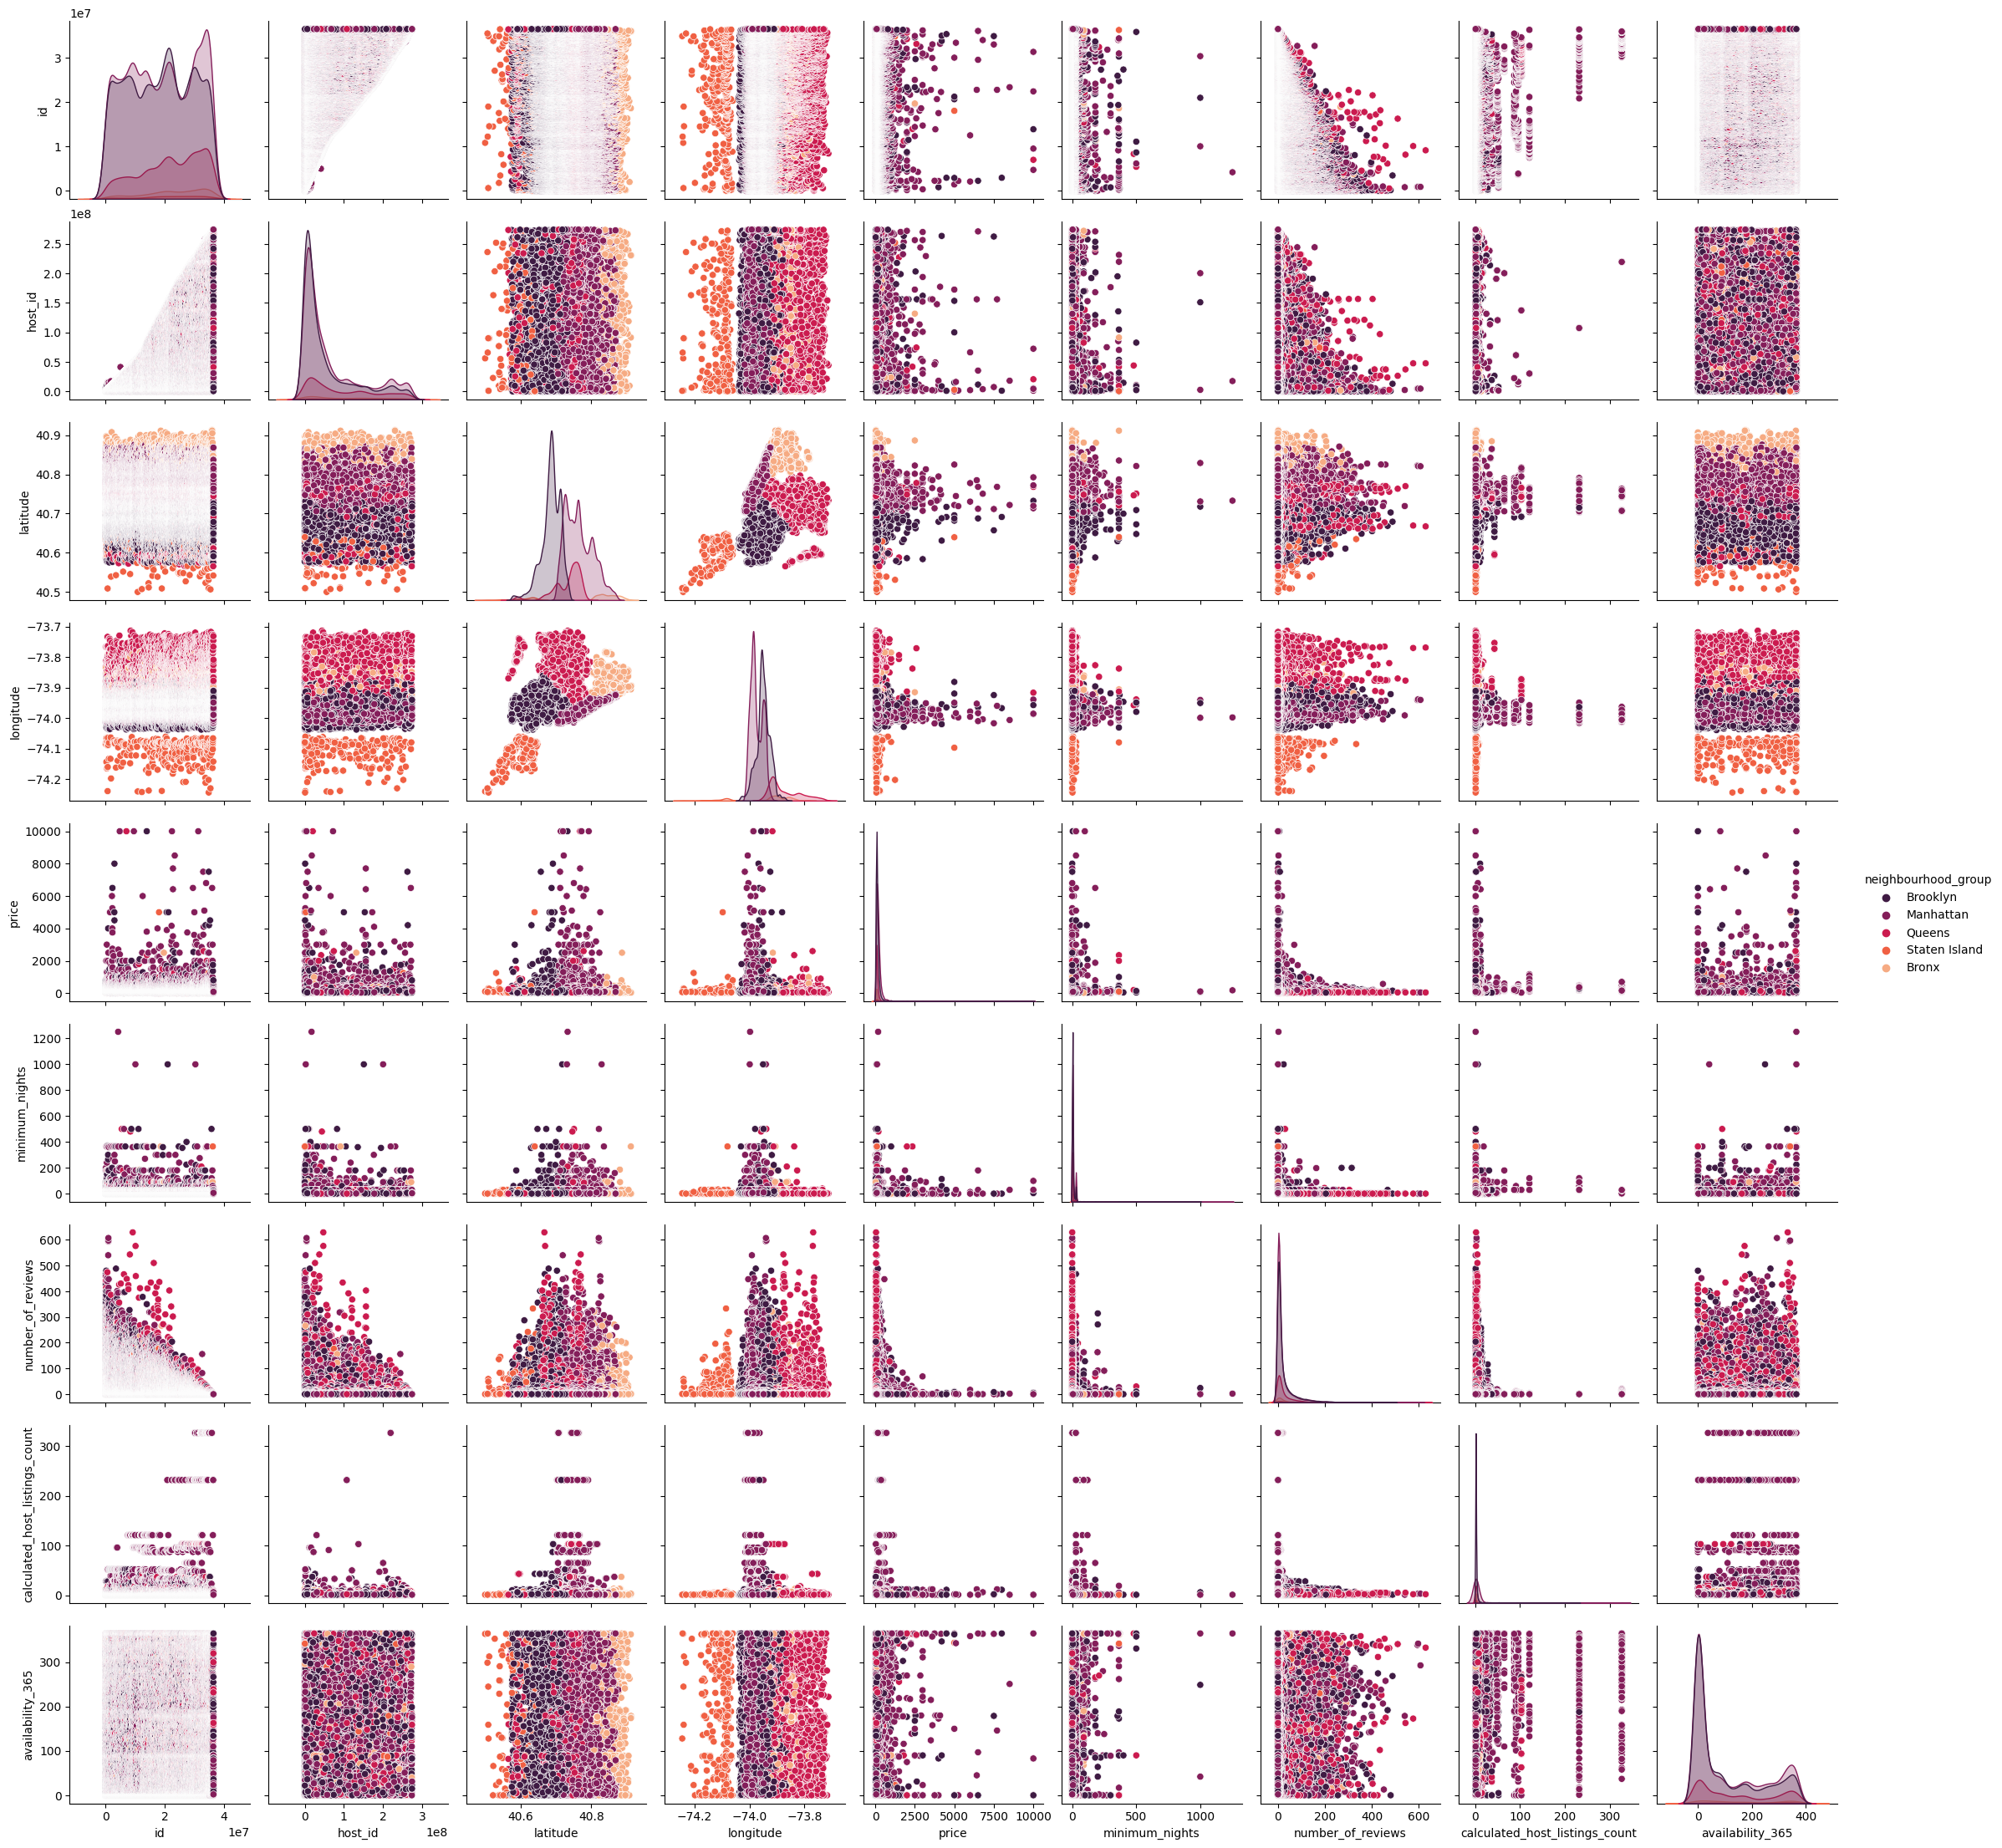

In [ ]:
# Pair Plot visualization

# Creating a line plot to visualize the  relationships between different variables in the Airbnb NYC dataset
sns.pairplot(new_df, palette = 'rocket',hue='neighbourhood_group')

# Displaying the plot
plt.show()

##### 1. Why did you pick the specific chart?

> Pair plot is used to visualizes the given data to find the relationship between them where the variables can be continuous or categorical. Pair Plot provides a high-level interface for drawing attractive and informative statistical graphics.

##### 2. What is/are the insight(s) found from the chart?

> We can see the interactions between different variables, we found strong correlations and dependencies among them. These relationships provided valuable insights into how changes in one variable corresponded with changes in others.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

> - Create an advanced search system that understands what travelers like, where they want to go, and how much they want to spend to suggest personalized choices.
> - Provide helpful resources and training sessions to hosts so they can make their listings better, give excellent service, and maintain high-quality accommodations.
> - Guarantee safety and trust within the community by verifying the identities of hosts and guests, securing payments, and offering round-the-clock customer support to resolve any problems.
> - Develop a tool for hosts to adjust their prices based on factors like demand, time of year, and local events, helping them earn more and stay competitive.
> - Run marketing campaigns and partner with influencers to make more people aware of Airbnb and bring in new users.
> - Encourage hosts to adopt environmentally friendly practices and offer sustainable lodging options to reduce the environmental impact of Airbnb listings.

> Through these solutions, Airbnb can move closer to its goal of building a prosperous marketplace that advantages both travelers and hosts, all while adding to the economic well-being of the communities it operates in.

# **Conclusion**

> - In conclusion, our analysis highlights Manhattan as the most sought-after neighborhood group for Airbnb bookings in New York City. This preference could be attributed to Manhattan's global recognition for its cultural attractions, stores, parks, and vibrant atmosphere. Travelers often opt for Entire Home/Apartment stays here for longer durations, driving up demand and prices.
> - Brooklyn, with its famous bridges, parks, museums, and more affordable pricing compared to Manhattan, also secures a significant number of bookings. Brooklyn ranks second in the number of reviews received, following Manhattan closely.
> - On the other hand, Queens, Bronx, and Staten Island witness notably fewer bookings and hosts. These areas might attract guests seeking budget-friendly options or those with specific short-term needs. Interestingly, these neighborhood groups tend to have higher room availability compared to Brooklyn and Manhattan.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***